### Setting Up Zillow City Data 

In [187]:
#This format is easer to look at changes in year for a specific city
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
 

zillow = pd.read_csv('City_Zhvi_AllHomes.csv', encoding="Latin-1")

zillow['RegionName'] = zillow['RegionName'].str.title()
zillow['RegionName'] = zillow['RegionName'].str.strip()
zillow['RegionName'] = zillow['RegionName'].str.replace(' City', '')
zillow['RegionName'] = zillow['RegionName'].str.replace(' Village', '')
zillow['State'] = zillow['State'].str.strip()

#getting a list of uniques years for creating new columns later when condensing the dataframe
year_list = (zillow.columns[6:].values.tolist())
years = []
for i in year_list:
    #[0:4] to remove the months following the years ex. '2018-04'
    y = i[0:4]
    if y not in years:
        years.append(y)
        
#Condensing the data into years
zillow_years = zillow.copy()
zillow_years = zillow_years.iloc[:, :6]
zillow_years['City_State'] = zillow_years['RegionName'] + ', ' + zillow_years['State']
# 1996-06 - 1996-12
zillow_years['1996'] = zillow.loc[:,"1996-06":"1997-01"].mean(axis=1)

for i in range(1997,2019):
    zillow_years[str(i)] = zillow.loc[:, str(i) + '-01': str(i+1) + '-01'].mean(axis=1)
#post 2019-01 - 
zillow_years['2019'] = zillow.loc[:,"2019-01":"2019-04"].mean(axis=1)


#zillow data that has months preserved
zillow['City_State'] = zillow['RegionName'] + ', ' + zillow['State']
zillow.head()


,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,City_State
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,169300.0,169800.0,170300.0,170600.0,...,670200,672900,677100,680100,680400,679300,679400,678900,677000,"New York, NY"
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,157700.0,157600.0,157500.0,157300.0,...,678900,682200,686100,688800,690300,691500,691100,688700,686100,"Los Angeles, CA"
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,86500.0,86600.0,86600.0,86700.0,...,181100,181800,182300,183200,184500,185800,187200,187200,186000,"Houston, TX"
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,114000.0,115100.0,116100.0,116600.0,...,227100,227300,227600,227800,228200,228500,229400,230000,229400,"Chicago, IL"
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,86600.0,86400.0,86300.0,86300.0,...,170300,171500,172700,173900,175000,175900,176500,176600,176100,"San Antonio, TX"


### 50 most expensive US cities in 1996, and where they are now 

In [188]:
#This format is easer to look at changes in year for a specific city

#Setting up
fiftychange = zillow_years.copy()

fiftychange['PriceChange'] = fiftychange['2019'] - fiftychange['1996']
fiftychange['PercentChange'] = (fiftychange['PriceChange'] / fiftychange['1996']) * 100
                
#sorting the dataframe
fiftychange = fiftychange.sort_values(by=['1996'], ascending = False)  
fifty96top50 = fiftychange[:50]

fifty96top50.head()


,RegionID,RegionName,State,Metro,CountyName,SizeRank,City_State,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,PriceChange,PercentChange
12852,4721,Fisher Island,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,12853,"Fisher Island, FL",1226200.0,1.229731e+06,1.206400e+06,...,1.972454e+06,2.256031e+06,2.569938e+06,2.896338e+06,3.152800e+06,3.293077e+06,3.172654e+06,3104075.0,1877875.0,153.145898
5799,30280,Atherton,CA,San Francisco-Oakland-Hayward,San Mateo County,5800,"Atherton, CA",1215987.5,1.315469e+06,1.519338e+06,...,3.398985e+06,4.102108e+06,4.581277e+06,5.315585e+06,5.623085e+06,6.181723e+06,6.702600e+06,6527875.0,5311887.5,436.837344
12317,124901,Jupiter Island,FL,Port St. Lucie,Martin County,12318,"Jupiter Island, FL",1187700.0,1.265977e+06,1.451931e+06,...,2.970208e+06,3.349377e+06,3.418300e+06,3.685362e+06,4.126969e+06,4.412385e+06,4.932708e+06,4934500.0,3746800.0,315.466869
11728,23458,Alpine,NJ,New York-Newark-Jersey City,Bergen County,11729,"Alpine, NJ",1075587.5,1.082785e+06,1.065523e+06,...,2.239746e+06,2.558192e+06,2.688738e+06,2.605523e+06,2.700069e+06,2.972408e+06,2.745277e+06,2460350.0,1384762.5,128.744756
11339,6822,Rolling Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,11340,"Rolling Hills, CA",1053862.5,1.058277e+06,1.051915e+06,...,1.922323e+06,2.390969e+06,2.700254e+06,3.060500e+06,3.206869e+06,3.226292e+06,3.353392e+06,3372275.0,2318412.5,219.991934


#### The top 5 most expensive cities in 1996 were:

    - Fisher Island, FL    (1,226,200)
    - Atherton, CA         (1,215,988)
    - Jupiter Island, FL   (1,187,700)
    - Alpine, NJ           (1,075,588)
    - Rolling Hills, CA    (1,053,863)
    
#### Their price in 2019 respectively are:
    - Fisher Island, FL    (3,104,075)
    - Atherton, CA         (6,527,875)
    - Jupiter Island, FL   (4,934,500)
    - Alpine, NJ           (2,460,350)
    - Rolling Hills, CA    (3,372,275)

### Top cities with growth, steady, decline 

In [189]:
fiftychange = fiftychange.sort_values(by=['PercentChange'], ascending = True)

fifty9619 = fiftychange.copy()
#Not interested in columns '1997 - '2018'

#Dropping the list of years so that it's just 1996 and 2019

for i in range(1997,2019):
    fifty9619 = fifty9619.drop(str(i), axis=1)

fifty9619= fifty9619.drop(columns=['RegionID','Metro','SizeRank'])
fifty9619= fifty9619.dropna()
fifty9619= fifty9619.sort_values(by=['PercentChange'], ascending= False)

#Cities with most growth
fifty9619top = fifty9619.head(25)
fiftypercenttop25 = fifty9619top['State'].value_counts()

#Cities with most decrease
fifty9619bottom = fifty9619.tail(25)
fifty9619bottom = fifty9619bottom.sort_values(by=['PercentChange'], ascending= True)
fiftypercentbottom25 = fifty9619bottom['State'].value_counts()

#Cities that stayed the same
fifty9619mid = fifty9619.copy()
fifty9619mid['PercentChange'] = fifty9619mid['PercentChange'].abs()
fifty9619mid = fifty9619mid.sort_values(by=['PercentChange'], ascending= True)
fifty9619mid = fifty9619mid.head(25)
fiftypercentmid = fifty9619mid['State'].value_counts()

fifty9619top.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
12845,Wainscott,NY,Suffolk County,"Wainscott, NY",383000.0,4020300.0,3637300.0,949.686684
12579,Amagansett,NY,Suffolk County,"Amagansett, NY",318762.5,3318175.0,2999412.5,940.955257
10978,Warriors Mark,PA,Huntingdon County,"Warriors Mark, PA",23675.0,200275.0,176600.0,745.934530
10993,Crumpler,NC,Ashe County,"Crumpler, NC",16175.0,133075.0,116900.0,722.720247
10214,Bridgehampton,NY,Suffolk County,"Bridgehampton, NY",319237.5,2601325.0,2282087.5,714.855711


In [190]:
fifty9619mid.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
10163,Walnut,IL,Bureau County,"Walnut, IL",79062.5,78925.0,-137.5,0.173913
1199,Euclid,OH,Cuyahoga County,"Euclid, OH",78837.5,78525.0,-312.5,0.396385
10377,Clintonville,WI,Waupaca County,"Clintonville, WI",76325.0,76650.0,325.0,0.425811
2628,Ferguson,MO,Saint Louis County,"Ferguson, MO",60875.0,61225.0,350.0,0.574949
11406,Cool Valley,MO,Saint Louis County,"Cool Valley, MO",54387.5,54725.0,337.5,0.620547


In [191]:
fifty9619bottom.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
276,Flint,MI,Genesee County,"Flint, MI",47100.0,19125.0,-27975.0,-59.394904
3715,Rock Falls,IL,Whiteside County,"Rock Falls, IL",105262.5,71275.0,-33987.5,-32.288327
11693,Phoenix,IL,Cook County,"Phoenix, IL",58125.0,41400.0,-16725.0,-28.774194
3818,Riverdale,IL,Cook County,"Riverdale, IL",68050.0,49650.0,-18400.0,-27.038942
10613,Capron,IL,Boone County,"Capron, IL",169275.0,127875.0,-41400.0,-24.457244


### Median Housing Price By State 

In [192]:
statemedian96 = fifty9619.groupby('State')['1996'].median()
statemedian19 = fifty9619.groupby('State')['2019'].median()

state96median= statemedian96.reset_index()
state19median = statemedian19.reset_index()
state9619medianmerged = state96median.merge(state19median, left_on='State', right_on='State')
state9619medianmerged.head()

,State,1996,2019
0,AK,120800.00,267600.0
1,AL,79800.00,145825.0
2,AR,65468.75,135312.5
3,AZ,88512.50,226425.0
4,CA,156012.50,497550.0


### US City Population Top 50

In [193]:
#uspop18 data starts from 2010 and ends with 2019

uspopraw = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding="Latin-1")
#population estimate from 2010 to 2018
states_list = pd.read_csv('states.txt', encoding="Latin-1")

#print(uspopraw.head())
#2018 population
uspop18 = pd.DataFrame()
uspop18 = uspopraw.iloc[1:,[2, -9,-8,-7,-6,-5,-4,-3,-2,-1]]
#should be up to -9 which will include 2010

uspop18.columns = ['city_state', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
# an initial sort revealed that the datatype for '2018' was not integer

#creating new columns from 2010 to 2018
for i in range(2010, 2019):
    uspop18[str(i)] = pd.to_numeric(uspop18[str(i)])
    
    
uspop18 = uspop18.sort_values(by=['2018'], ascending = False)

#data cleaning
uspop18['city_state'] = uspop18.city_state.str.title()
uspop18['city_state'] = uspop18.city_state.str.strip()
uspop18['city'], uspop18['state'] = uspop18.city_state.str.split(',').str
uspop18['city'] = uspop18['city'].str.title()
uspop18['city'] = uspop18['city'].str.strip()
uspop18['city'] = uspop18['city'].str.replace(' County Metro Government', '')
uspop18['city'] = uspop18['city'].str.replace(' Metropolitan Government', '')
uspop18['city'] = uspop18['city'].str.replace(' Borough', '')
uspop18['city'] = uspop18['city'].str.replace(' County', '')
uspop18['city'] = uspop18['city'].str.replace(' City', '')
uspop18['city'] = uspop18['city'].str.replace(' city', '')
uspop18['city'] = uspop18['city'].str.replace(' Town', '')
uspop18['city'] = uspop18['city'].str.replace(' town', '')
uspop18['city'] = uspop18['city'].str.replace(' Village', '')
uspop18['city'] = uspop18['city'].str.replace(' village', '')
uspop18['city'] = uspop18['city'].str.replace(r'\(.*\)','')
#Removes (Balance)
uspop18['city'] = uspop18['city'].str.replace('.', '')
uspop18['city'] = uspop18['city'].str.strip()
uspop18['state'] = uspop18['state'].str.strip()


#Remapping uspop18 so that the format would be matching the zillow_years in 'Pasadena, CA' format
states_list.State = states_list.State.str.title()
#without this above line, the result for DC would be nan, since one is District of Columbia, vs District Of Columbia
states_dic = states_list.set_index('State')['Abbreviation'].to_dict()
uspop18['state_abb'] = uspop18['state'].map(states_dic)
uspop18['city_state_cleaned'] = uspop18['city'] + ', ' + uspop18['state_abb']


#top50cities = uspop18[:51]

#new dataframe prepared for merging with zillow_years
uspop18merge = pd.DataFrame()
uspop18merge['2010'] = uspop18['2010']
uspop18merge['2011'] = uspop18['2011']
uspop18merge['2012'] = uspop18['2012']
uspop18merge['2013'] = uspop18['2013']
uspop18merge['2014'] = uspop18['2014']
uspop18merge['2015'] = uspop18['2015']
uspop18merge['2016'] = uspop18['2016']
uspop18merge['2017'] = uspop18['2017']
uspop18merge['2018'] = uspop18['2018']


uspop18merge['City_State'] = uspop18['city_state_cleaned']
#uspop18mergefinal = uspop18merge.sort_values(by=['2018'], ascending = False)
uspop18merge.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,City_State
11698,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748,"New York, NY"
1443,3795370,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456,"Los Angeles, CA"
3415,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994,"Chicago, IL"
17040,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502,"Houston, TX"
665,1449295,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,"Phoenix, AZ"


### Top 5 Populated City Price Data Visualized

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


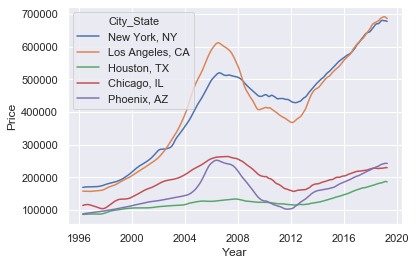

In [194]:
zillowvisual = zillow.copy()
zillowvisual = zillowvisual.iloc[:, 6:]

zillowvisuallong = pd.melt(zillowvisual, id_vars='City_State', var_name='Year', value_name='Price')
top5pop_cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ']
#These are the top 5 most populated cities

zillowvisualtop5 = zillowvisuallong[zillowvisuallong.City_State.isin(top5pop_cities)]
zillowvisualtop5['Year'] = pd.to_datetime(zillowvisualtop5['Year'], format= '%Y-%m')

sns.set()
top5plot = sns.lineplot(x='Year', y='Price', hue='City_State', data=zillowvisualtop5)

### Complete Reversed

In [195]:
#from fuzzywuzzy import fuzz
#
##Left- zillow_years
##Right- uspop18mergefinal
#
#def match_name(name, match_list, min_score=0):
##iterating through list names and returns best match (name2) for name
#    # -1 score incase we don't get any matches
#    max_score = -1
#    # Returning empty name for no match as well
#    max_name = ""
#    # Iternating over all names in the other
#    for matchname in match_list:
#        name = str(name)
#        matchname = str(matchname)
#        if matchname[-2:] == name[-2:]:
#            #Finding fuzzy match score
#            score = fuzz.ratio(name, matchname)
#            # Checking if we are above our threshold and have a better score
#            if (score > min_score) & (score > max_score):
#                max_name = matchname
#                max_score = score
#    return (max_name, max_score)
#    
#dict_list = []
#for name in uspop18mergefinal.City_State:
#    match = match_name(name, zillow_years.City_State, 60)
#    # New dict for storing data
#    dict_ = {}
#    dict_.update({"Name" : name})
#    dict_.update({"Match-Name" : match[0]})
#    dict_.update({"score" : match[1]})
#    dict_list.append(dict_)
#    
#merge_tablecompletehongreversed = pd.DataFrame(dict_list)
#
#
#

In [196]:
import pickle

#pickle_out = open('merge_tablecompletehongreversed.pickle', 'wb')
#pickle.dump(merge_tablecompletehongreversed, pickle_out)
#pickle_out.close()

pickle_in = open('merge_tablecompletehongreversed.pickle', 'rb')
merge_tablecompletehongreversed = pickle.load(pickle_in)

### List matching for entire Zillow_year with uspop

In [197]:
#Taking the dataframe apart, removing - and /

merge_complete = merge_tablecompletehongreversed.copy()

slash = merge_complete[merge_complete['Name'].str.contains('/', na = False)]
dash = merge_complete[merge_complete['Name'].str.contains('-', na = False)]
saint = merge_complete[merge_complete['Name'].str.contains('St ', na = False)]

#realzing that nashville, TN didn't merge so coming back to edit this in
#nashvilleindex = merge_complete[merge_complete['Name'].str.contains('Nashville', na = False)]
nashville = merge_complete[merge_complete['Name'] == 'Nashville-Davidson, TN']

merge_complete = merge_complete.drop(slash.index.values, axis=0)
merge_complete = merge_complete.drop(dash.index.values, axis=0)
merge_complete = merge_complete.drop(saint.index.values, axis=0)
merge_complete = merge_complete[merge_complete['score'] >= 95]

#after some analysis, it seems like everything 97 and above is good except La Canana from 96

merge_complete = merge_complete.sort_values(by=['score'], ascending = False)
merge_complete.tail(20)
laca = merge_complete[merge_complete['Name'] == 'La Cañada Flintridge, CA']

#This is to get the index of 'La Canada Flintridge'
merge_complete.loc[1813,'score'] = 97
merge_complete.drop(merge_complete[merge_complete['score'] < 97].index, inplace= True)
#merge_complete.tail(20)
merge_complete.to_csv('mergecomplete.csv', index= False)

#cleaning up the saint
#dash[dash['score']>50]
saint = saint.sort_values(by=['score'], ascending = False)
#east petersberg is the only one with 89 that's not accurate 14559
saint.loc[14559, 'score'] = 88
saint = saint[saint['score'] > 88]


dash = dash.sort_values(by=['score'], ascending= False)
dash.loc[59, 'score'] = 95
dash.loc[8059, 'score'] = 85
# 59 Lexington-Fayette Urban, KY is the only low score which should match
#8059 Avon-By-The-Sea, NJ is scored 84, should bump up to 85 and remove everyting below 85
dash = dash[dash['score'] > 84]

merge_combined = pd.concat([merge_complete, slash, dash, saint, nashville])
merge_combined.drop(['score'], axis=1, inplace= True)
merge_combinedmap = merge_combined[['Name', 'Match-Name']]
#This flips the order of the Name and Match-Name so that population data(Name) is now on left


In [198]:
#mapping dictionary for uspop18merge

popfinalmerge = uspop18merge.copy()
uspoptozillowmap = merge_combinedmap.copy()

uspoptozillowmap = uspoptozillowmap.set_index('Name')['Match-Name'].to_dict()
#mapping pop18merge to zillow_years on 'City_State'
popfinalmerge['City_State'] = popfinalmerge['City_State'].map(uspoptozillowmap)

#12946 Detroit city, Michigan
#12947 Nashville-Davidson metropolitan government (balance), Tennessee
#zillpopsorted18.to_csv('zillpopfinal.csv', index=False)

#popmelted = pd.melt(popfinalmerge, 
#                    id_vars = ['City_State'], 
#                    var_name = 'Year', 
#                    value_name = 'Population'
#                   )


popfinalmerge.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,City_State
11698,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748,"New York, NY"
1443,3795370,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456,"Los Angeles, CA"
3415,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994,"Chicago, IL"
17040,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502,"Houston, TX"
665,1449295,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,"Phoenix, AZ"


Calculating population change percent so that visualizationw would be clearer

In [199]:
popchange = popfinalmerge.copy()
for i in range(2010,2018):
    popchange[str(i)+'-'+str(i+1)] = ((popchange[str(i+1)] - popchange[str(i)]) /popchange[str(i)] )*100
popchange = popchange.iloc[:,9:]

popchange.head()

,City_State,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018
11698,"New York, NY",1.008601,0.907402,0.607413,0.460164,0.364971,0.092050,-0.444846,-0.468378
1443,"Los Angeles, CA",0.678880,0.821640,0.814633,0.755526,0.765474,0.660552,0.320966,0.212305
3415,"Chicago, IL",0.395918,0.425595,0.258738,0.064252,-0.084625,-0.266633,-0.216223,-0.260701
17040,"Houston, TX",1.224573,1.692118,1.768170,1.942519,2.036964,1.011182,0.333066,0.347667
665,"Phoenix, AZ",1.432214,2.026255,1.833330,1.912873,1.822939,1.807907,1.326429,1.546682


### Top 5 Most Populated Cities Visualized

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

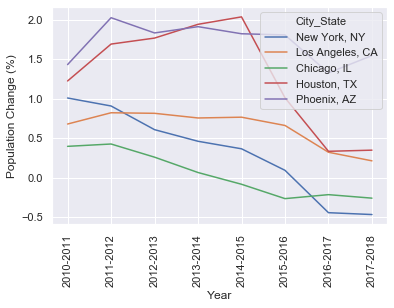

In [200]:
popfinalvisualize = popchange.dropna()
popfinalvisualize = pd.melt(popfinalvisualize, id_vars='City_State', var_name='Year', value_name='Population Change (%)')
top5pop_cities = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ']
popfinalvisualize = popfinalvisualize[popfinalvisualize.City_State.isin(top5pop_cities)]
popfinalvisualize.head()

top5 = sns.lineplot(x='Year', y='Population Change (%)', hue='City_State', data=popfinalvisualize)
plt.xticks(rotation=90)

### Merging Zillyear with population
 

In [201]:
zillyears = zillow_years.copy()
#zillyears = zillyears.drop('RegionID', axis=1)
#zillyears = zillyears.drop('RegionName', axis=1)
#zillyears = zillyears.drop('State', axis=1)
#zillyears.to_csv('zillyearsduplicate.csv', index=False)

zilldroplist = []
for i in range(1996,2010):
    zilldroplist.append(str(i))
zillyears.drop(zilldroplist, axis=1, inplace=True)
zillyears.drop('2019', axis=1, inplace=True)


uspoppremerge = uspop18merge.copy()
uspoppremerge.columns = ['2010_Population', '2011_Population', '2012_Population', '2013_Population', '2014_Population', '2015_Population', '2016_Population', '2017_Population', '2018_Population', 'City_State']
zillpopmerged = zillyears.merge(uspoppremerge, left_on = 'City_State', right_on = 'City_State')

### Other Features (Unemployment Rate, GDP Growth, Federal Interest Rate, CPI)

In [202]:
dow = pd.read_csv('^DJI.csv')
nasd = pd.read_csv('^IXIC.csv')
unempl = pd.read_csv('UNRATE.csv')
intrate = pd.read_csv('FEDFUNDS.csv')

gdp = pd.read_csv('GDPus.csv')

gdp = pd.melt(gdp, var_name='Date', value_name='GDP')
gdp = gdp.iloc[1:-2,:]


dow.drop(['Open','High','Low','Adj Close','Volume'], axis = 1, inplace = True) 
dow.rename(columns = {'Close':'DowPrice'}, inplace = True) 

nasd.drop(['Open','High','Low','Adj Close','Volume'], axis = 1, inplace = True) 
nasd.rename(columns = {'Close':'NasqPrice'}, inplace = True) 

unempl.columns = ['Date', 'UnRate %']

intrate.columns = ['Date', 'IntRate %']

def downsample(df, col, period):
    df[col] = pd.to_datetime(df[col])
    df = df.set_index(col)
    df = df.resample(period).mean()
    df = df.reset_index()
    df[col] = df[col].dt.strftime('%Y-%m')
    return df
    
intratey = downsample(intrate, 'Date', 'M')
unemply = downsample(unempl, 'Date', 'M')
dowy = downsample(dow, 'Date', 'M')
nasdy = downsample(nasd, 'Date', 'M')

intunmerge = unemply.merge(intratey, left_on = 'Date', right_on = 'Date')
downasdymerge = dowy.merge(nasdy, left_on = 'Date', right_on = 'Date')

ziltop5 = zillowvisualtop5.copy()
ziltop5.head()
ziltop5 = ziltop5.rename(columns={'Price':'HousingPrice'})
ziltop5['Date'] = ziltop5['Year'].dt.strftime('%Y-%m')

ziltop5 = ziltop5.drop(['Year'], axis=1)
zildownasmerge = ziltop5.merge(downasdymerge, left_on = 'Date', right_on = 'Date')
zildownasmerge = zildownasmerge[['Date','City_State','HousingPrice','DowPrice','NasqPrice']]
zildownasmerge.head()

#idnugmerge_cols = list(idnugmerge.columns)
#idnugmerge.columns = ['Year', 'IntRate', 'DowPrice', 'NasqPrice', 'UnRate', 'GDP (%)']

,Date,City_State,HousingPrice,DowPrice,NasqPrice
0,1996-04,"New York, NY",169300.0,5579.864351,1135.628092
1,1996-04,"Los Angeles, CA",157700.0,5579.864351,1135.628092
2,1996-04,"Houston, TX",86500.0,5579.864351,1135.628092
3,1996-04,"Chicago, IL",114000.0,5579.864351,1135.628092
4,1996-04,"Phoenix, AZ",88100.0,5579.864351,1135.628092


In [203]:
from sklearn.preprocessing import MinMaxScaler

#Normalizing the data using MinMaxScaler
#https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
#https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn

scaler = MinMaxScaler() 
zildownasmerge[['HousingPrice', 'DowPrice', 'NasqPrice']] = scaler.fit_transform(zildownasmerge[['HousingPrice', 'DowPrice', 'NasqPrice']])
zildownasmerge.head()

,Date,City_State,HousingPrice,DowPrice,NasqPrice
0,1996-04,"New York, NY",0.136860,0.003999,0.004357
1,1996-04,"Los Angeles, CA",0.117686,0.003999,0.004357
2,1996-04,"Houston, TX",0.000000,0.003999,0.004357
3,1996-04,"Chicago, IL",0.045455,0.003999,0.004357
4,1996-04,"Phoenix, AZ",0.002645,0.003999,0.004357


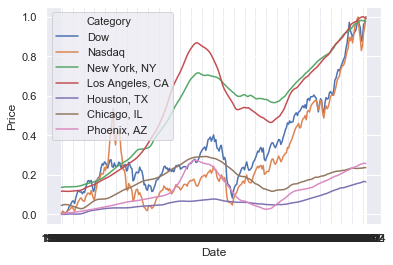

In [204]:
import numpy as np


zildowreshaped = pd.concat([
    zildownasmerge.groupby("Date")["DowPrice"].first().to_frame().rename(
        columns={"DowPrice": "Price"}
    ).assign(Category="Dow"), 
    zildownasmerge.groupby("Date")["NasqPrice"].first().to_frame().rename(
        columns={"NasqPrice": "Price"}
    ).assign(Category="Nasdaq"), 
    zildownasmerge.set_index("Date").rename(
        columns={"City_State": "Category", "HousingPrice": "Price"}
    ).drop(["NasqPrice", "DowPrice"], axis=1)
], axis=0, sort=False).reset_index()

zildow = sns.lineplot(x='Date', y='Price', hue='Category', data=zildowreshaped)


##  Project Summary

#### The top 5 most expensive cities in 1996 were:

    - Fisher Island, FL    (1,226,200)
    - Atherton, CA         (1,215,988)
    - Jupiter Island, FL   (1,187,700)
    - Alpine, NJ           (1,075,588)
    - Rolling Hills, CA    (1,053,863)
    
#### Their price in 2019 respectively are:
    - Fisher Island, FL    (3,104,075)
    - Atherton, CA         (6,527,875)
    - Jupiter Island, FL   (4,934,500)
    - Alpine, NJ           (2,460,350)
    - Rolling Hills, CA    (3,372,275)

### Housing Price Change between 1996 and 2019 

Here are the 5 cities that has increased the most in housing price:

In [205]:
fifty9619top.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
12845,Wainscott,NY,Suffolk County,"Wainscott, NY",383000.0,4020300.0,3637300.0,949.686684
12579,Amagansett,NY,Suffolk County,"Amagansett, NY",318762.5,3318175.0,2999412.5,940.955257
10978,Warriors Mark,PA,Huntingdon County,"Warriors Mark, PA",23675.0,200275.0,176600.0,745.934530
10993,Crumpler,NC,Ashe County,"Crumpler, NC",16175.0,133075.0,116900.0,722.720247
10214,Bridgehampton,NY,Suffolk County,"Bridgehampton, NY",319237.5,2601325.0,2282087.5,714.855711


Here are the 5 cities with the most stable housing price:

In [206]:
fifty9619mid.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
10163,Walnut,IL,Bureau County,"Walnut, IL",79062.5,78925.0,-137.5,0.173913
1199,Euclid,OH,Cuyahoga County,"Euclid, OH",78837.5,78525.0,-312.5,0.396385
10377,Clintonville,WI,Waupaca County,"Clintonville, WI",76325.0,76650.0,325.0,0.425811
2628,Ferguson,MO,Saint Louis County,"Ferguson, MO",60875.0,61225.0,350.0,0.574949
11406,Cool Valley,MO,Saint Louis County,"Cool Valley, MO",54387.5,54725.0,337.5,0.620547


Here are the 5 cities that has decreased the most in housing price:

In [207]:
fifty9619bottom.head()

,RegionName,State,CountyName,City_State,1996,2019,PriceChange,PercentChange
276,Flint,MI,Genesee County,"Flint, MI",47100.0,19125.0,-27975.0,-59.394904
3715,Rock Falls,IL,Whiteside County,"Rock Falls, IL",105262.5,71275.0,-33987.5,-32.288327
11693,Phoenix,IL,Cook County,"Phoenix, IL",58125.0,41400.0,-16725.0,-28.774194
3818,Riverdale,IL,Cook County,"Riverdale, IL",68050.0,49650.0,-18400.0,-27.038942
10613,Capron,IL,Boone County,"Capron, IL",169275.0,127875.0,-41400.0,-24.457244


### Top 5 Most US Populated Cities  

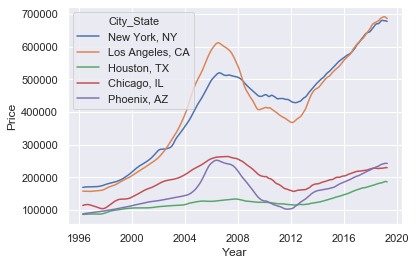

In [208]:
top5plot = sns.lineplot(x='Year', y='Price', hue='City_State', data=zillowvisualtop5)

### 50 States Median Home Price (1996, 2019)

Here are the median home prices for all 50 states, years 1996 and 2019

In [209]:
state9619medianmerged

,State,1996,2019
0,AK,120800.00,267600.0
1,AL,79800.00,145825.0
2,AR,65468.75,135312.5
3,AZ,88512.50,226425.0
4,CA,156012.50,497550.0
5,CO,122981.25,384137.5
6,CT,136531.25,255487.5
7,DC,113037.50,578850.0
8,DE,110637.50,291500.0
9,FL,82650.00,229675.0
